In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions as linear_reg

In [6]:
# Loading data
df = pd.read_csv("california_housing.csv", usecols=['median_income', 'median_house_value'])
df

,median_income,median_house_value
0,6.6085,344700.0
1,3.5990,176500.0
2,5.7934,270500.0
3,6.1359,330000.0
4,2.9375,81700.0
...,...,...
2995,1.1790,225000.0
2996,3.3906,237200.0
2997,2.2895,62000.0
2998,3.2708,162500.0


In [53]:
# TEST VS TRAIN
np.random.seed(30)
x = df.median_income.sample(600)
x_test = np.array(x)
y = df.median_house_value[x.index]
y_test = np.array(y)
x_test.shape, y_test.shape

((600,), (600,))

In [52]:
x_train = df.median_income.drop(x.index, axis=0)
x_train = x_train.to_numpy()
y_train = df.median_house_value.drop(x.index, axis=0)
y_train = y_train.to_numpy()
x_train.shape, y_train.shape

((2400,), (2400,))

In [56]:
w_init = 0
b_init = 0
w,b = linear_reg.gradient_descent(x_train,y_train, w_init, b_init, 0.01, 10000)
w,b

Iteration: 0  Cost: 19618329449.534077
Iteration: 1000  Cost: 3557160133.6223345
Iteration: 2000  Cost: 3553404237.3472013
Iteration: 3000  Cost: 3553305541.551539
Iteration: 4000  Cost: 3553302948.06669
Iteration: 5000  Cost: 3553302879.9162254
Iteration: 6000  Cost: 3553302878.125395
Iteration: 7000  Cost: 3553302878.0783477
Iteration: 8000  Cost: 3553302878.0771103
Iteration: 9000  Cost: 3553302878.077079


(41066.03179865619, 49945.73659491967)

In [64]:
def predict(x,w,b):
    m = x.shape[0]
    y = []
    for i in range(m):
        y.append(w * x[i] + b)
    return np.array(y)

y_predicted = predict(x_test, w, b)

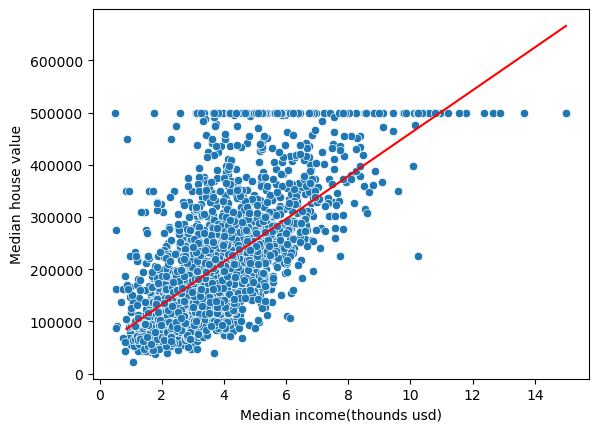

In [65]:
sns.scatterplot(x=x_train, y=y_train)
sns.lineplot(x=x_test, y=y_predicted, color='red')
plt.xlabel('Median income(thounds usd)')
plt.ylabel('Median house value')
plt.show()

In [66]:
# Calculate MAE
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))
mae(y_test, y_predicted)

61013.19677764601

In [67]:
# Let's do it with Sklearn
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [69]:
LR.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))

LinearRegression()

In [70]:
LR.coef_[0], LR.intercept_ # w,b

(array([41066.03169323]), array([49945.7370882]))

In [73]:
y_predicted = LR.predict(x_test.reshape(-1,1))
mae(y_test, y_predicted)

103067.73695014947